In [1]:
import random
import numpy as np
import math
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd

# Genetic Algorithm in Cryptography

The various steps include 
    1) Population Genration
    2) Fitness Test for each
    3) Selecting the best two for crossover by the means of fitness test
    4) Crossover of the selected two with higher values
    5) Mutating them

We can use hexa keys for this encryption process but we used binary keys according to the algorithm.

# Initial Population Generation

In [2]:
def bin_pop_gen(size,allzeros):
    key = ''
    if(allzeros == True):
        for i in range(size):
            key += '0'
    else:
        for i in range(size):
            key += str(random.randint(0,1))
    return (key)

def hex_pop_gen(size,allzeros):
    key = ''
    l = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    if(allzeros == True):
        for i in range(size):
            key += '0'
    else:
        for i in range(size):
            key += str(random.choice(l))
    return (key)

In [251]:
bin_pop_gen(100,False)


'0011101101110011000010010010011111110111101011010111111110101111011111110100011111101110111101101011'

In [4]:
def ini_pop(size):
    d = {}
    for i in range(32):
        k = 'key'+str(i)
        d[k] = bin_pop_gen(size,False)
    return d

In [5]:
pop = ini_pop(128) #THis is also called generation and each item is called an individual
pop

{'key0': '01011001000111110100010110111100010011001011111001001001111111101011101111000010100000110111111000110010000111101100111111011000',
 'key1': '10111001101110001101001101010010010010100010000001111111100000101100011000000011001000100010001011010011011110000100010110000101',
 'key2': '10000001111011000000000101100001110001110010100100011010110001010011001011011100000011100110100110100001000110110001000111000111',
 'key3': '00100100101100001010001101101100010001111010110010011100001100000111111101010011110001011000000100100001010000000100111010111100',
 'key4': '01110011110001101111000000000011010010110001110000000100110001001100100111011000011001000010011101010110010001100110100010110000',
 'key5': '00011100001001100010100010001010000000001110111101111011110111110111101010011111011101111000110000110001010000101110011101110000',
 'key6': '01100100110001111010000111101010011100111111111101110010110110100100000011000001101010010001010010010101001111110001101111000110',
 'key7': '101

# Fitness Test 1 

This deals with finding the no. of ones in a single key.

In [6]:
def ff1(indi):
    c = 0
    for i in indi:
        if(i == "1"):
            c+=1
    return c

In [7]:
def totalfit(pop):      #For normalization purposes
    s = 0
    for i in range(len(pop)):
        s += ff1(pop['key'+str(i)])
    return s


def r_value(indi,total):   #The metric on which we rely on selecting the best_two
    return ff1(indi)/total

def get_key(val,d):        #For ease purposes
    for key, value in d.items(): 
         if val == value: 
            return key

# Selecting the best two from the population

In [252]:
def best_two(pop):
    r_values = {}
    for i in range(len(pop)):
        total = totalfit(pop)
        r = r_value(pop['key'+str(i)],total)
        r_values[pop['key'+str(i)]] = r
    l = list(r_values.values())
    r1 = np.array(l)
    r1 = np.unique(r1)
    r1,r2 = list(np.sort(r1)[::-1])[:2]
    
    return get_key(r1,r_values),get_key(r2,r_values)

best_two(pop)

('11100110101011000110101011001111001110001011011101111101100011001000110100011010001111110001011011101101001111100111000100111101',
 '01011001000111110100010110111100010011001011111001001001111111101011101111000010100000110111111000110010000111101100111111011000')

# Crossover

We crossover half of the first binary equivalent with the other one and vice versa.

In [253]:
def crossover(a,b):
    la = int(len(a)/2)
    lb = int(len(b)/2)
    a1 = a[:la]
    a2 = b[la:]
    b1 = b[:lb]
    b2 = a[la:]
    return a1+a2, b1+b2

crossover('11001010','01000101')

('11000101', '01001010')

# Mutation

We mutate the first, middle and also the last bit which gives us a modified individual from the selected ones.

In [10]:
def mutate(a):
    st = ''
    la = int(len(a)/2)
    if(a[0] == '0'):
        st+='1'
    else:
        st+='0'
    for i in range(1,len(a)-1):
        if(i == la):
            if(a[la] == '1'):
                st += '0'
            elif(a[la] == '0'):
                st += '1'
        else:
            st += a[i]
    if(a[len(a)-1] == '0'):
        st+='1'
    else:
        st+='0'
    return st

mutate("11001010")

'01000011'

# Fitness Test 2

This is another evaluation function used for evaluating our best two strings and to pick one. This function checks for most number of '1111' occurences in a given binary string.

In [11]:
def ff2(k1):
    k = '1111'
    c = 0
    
    for f in range(len(k1)-3):
        j=''
        for i in range(f,f+4):
            j+=k1[i]
        if(j==k):
            c+=1
        else:
            continue
    return c

ff2('1111000001111000001111')

3

# Initial Key Selection

This is a crucial step in our algorithm which selects the best key from a given population. All the above 

In [300]:
def initial_key(size):
    pop = ini_pop(size)
    k1,k2 = best_two(pop)
    c1,c2 = crossover(k1,k2)
    c1,c2 = mutate(c1),mutate(c2)
    while(True):
        if(ff2(c1) > ff2(c2)):
            return c1
            break
        elif(ff2(c1) < ff2(c2)):
            return c2
            break
        else:
            pop[(get_key(k1,pop))]=bin_pop_gen(size,True)
            pop[(get_key(k2,pop))]=bin_pop_gen(size,True)
            k1,k2 = best_two(pop)
            c1,c2 = crossover(k1,k2)
            c1,c2 = mutate(c1),mutate(c2)

initial_key(128)

'00010111111111000010001111110111011100010110110001100110111010000100011100011010110000011101101110011111110011010110101011000110'

In [256]:
def data_block_gen(data):
    block = ''
    sentences = sent_tokenize(data)
    for sent in sentences:
        b = ''.join(format(i,'b') for i in bytearray(sent,encoding='UTF-8'))
        block+=b
    return block

data_block_gen("cryptography is good")

'110001111100101111001111000011101001101111110011111100101100001111000011010001111001100000110100111100111000001100111110111111011111100100'

XOR function which will be helped in  the code below for Dynamic Key generation

In [14]:
def xor(a,b): #equal lengths
    x = ''
    for i in range(0,int((len(b)+len(a))/2)):
        if(a[i] == b[i]):
            x+='0'
        else:
            x+='1'
    return x

In [15]:
def decode_binary_string(s, encoding='ascii'):   #Used for decoding a binary string back to text
    byte_string = ''.join(chr(int(s[i*7:i*7+7],2)) for i in range(len(s)//7))
    return byte_string

In [16]:
def bits(block):      #Count the number of bits in a data block
    return len(data_block_gen(block))

bits("I am working on cryptography")

192

In [17]:
def addZeros(strr, n):  #Functions used to make things easy in this algo
    for i in range(n): 
        strr = "0" + strr 
    return strr 

def getXOR(a, b):   #Alterantive XOR function for variable length binary strings
    aLen = len(a) 
    bLen = len(b) 
    if (aLen > bLen): 
        b = addZeros(b, aLen - bLen) 
    elif (bLen > aLen): 
        a = addZeros(a, bLen - aLen) 
  
    lenn = max(aLen, bLen); 

    res = "" 
    for i in range(lenn): 
        if (a[i] == b[i]): 
            res += "0"
        else: 
            res += "1"
  
    return res 

# Automatic Variable Key generation (AVK)

This is step we proceed to after getting our initial key. Imagine a sender and a reciever. Before establishing any connection they share there private keys and then start sending messages. 
The basic idea is to variate the key according to the data which makes it unbreakable and also less random.

In [285]:
mes = 'CryptographyisUseful'   #Let this be the message
key = initial_key(bits(mes))    #Picking a initial key

def auto_var_key(message,key):
    return getXOR(data_block_gen(message),key)

In [286]:
cipher = auto_var_key(mes,key)
original_text = getXOR(cipher,key)

decode_binary_string(cipher), decode_binary_string(original_text) #An example on generating a cipher and its decrypted part

('K\x14P_"k\x12J>=~o.y#\x1e\x1a]@\x14', 'CryptographyisUseful')

# Decimal Automatic Variable Key (DCSAVK)

This is another method that increases the randomness of a key making it more dependent on data.

AVK follows key[i] = key[i-1] XOR Data[i-1] (data sent before)
DCSAVK follows key[i] = key^[i-1] XOR Data[i-1] (^ meaning shift and the number it will shift is the decimal value of                                                  the above AVK equation)

In [260]:
def circular_shift(n,d,dire):
    if(dire == 'right'):
        shift = ''
        for i in range(len(n)-d,len(n),1):
            shift+=n[i]
        for i in range(0,len(n)-d,1):
            shift+=n[i]
    if(dire == 'left'):
        shift = ''
        for i in range(d+1,len(n),1):
            shift+=n[i]
        for i in range(0,d+1,1):
            shift+=n[i]
            
    return shift

circular_shift('111001101',3,'right')

'101111001'

In [264]:
def remove_spaces(message):
    string = ''
    for m in message:
        if(m != ' '):
            string+=m
    return string

remove_spaces('to remove all the spaces')

def remove_utf(mess,o):
    l = len(remove_spaces(o))
    rl =len(mess) - l
    s = ''
    for i in range(rl,len(mess)):
        s+=mess[i]
    return s
    

remove_utf('\x00\x00\x00Howareyou','How are you')

'Howareyou'

In [308]:
def dec_avk(mes0,mes1): #The Decimal AVK Algorithm
    mes0 = remove_spaces(mes0)
    mes1 = remove_spaces(mes1)
    key = initial_key(bits(mes0))
    d = auto_var_key(mes0,key)
    n = int(d,2)%int(len(key)/2)
    key = circular_shift(key,n,'right')
    cipher = getXOR(data_block_gen(mes1),key)
    
    decrypt = getXOR(cipher,key)
    
    return decode_binary_string(cipher), decode_binary_string(decrypt)

dec_avk('I am loukik and i am working','this and show the answer')

('&\x1aZ%f4>1>\x18Dg\x0c\r\x00\x06r\x17\x14\x0cj>',
 '\x00\x00thisandshowtheanswer')

# Implemention at one place

We made a function called simulation that:
    1) Exchanges the keys
    2) Finds the Decimal AVK of the series of messages which are likely to be sent by the sender

In [189]:
def simulation(send_mess):
    ciphers = []
    orig = []
    c,o = dec_avk('Gentic Alogrithm',send_mess[0])
    ciphers.append(c)
    orig.append(o)
    for i in range(len(send_mess)-1):
        c,o = dec_avk(send_mess[i],send_mess[i+1])
        ciphers.append(c)
        orig.append(o)
   
    
    return ciphers,orig

In [190]:
def simulation_avk(send_mess,rec_mess):
    keys = []
    rec_coll = []
    
    #Private keys of sender and reciever
    PSK = initial_key(bits(send_mess[0]))
    PRK = initial_key(bits(rec_mess[0]))
    
    #Exchange of key (Sender and reciever will have both his private key along the reciver private key)
    temp = PSK
    PSK = PRK
    PRK = temp
    
    #Transmision of messages from sender to reciever
    for m in range(0,len(send_mess)):
        keys.append(PRK)
        new_key = auto_var_key(send_mess[m-1],keys[m-1])
        keys.append(new_key)
        rec_coll.append(decode_binary_string(new_key))
    
    return rec_coll

simulation_avk(['previous','present'],['one','two'])

['N\x07\x14Yv\x16C\n', '>\x05\x03Jl\x1cX\r']

In [270]:
s = ['First Message','Is this right','Did we get the message properly','Lets check all of them']
simulation(s)

(['*\x18l\x1f\x06\x0e8\x07\x08m\x08\x1c\x07^\x1c',
  '58\x00Z\x7fdG}\x16tBi',
  'Didwegetthemess\x04*\x10\x06K\x03I\x11\\\x13G',
  '[UW&mC}_G5\x7f\x15\x19z\x13`W\x16r\x0e\x08\x0bP{\x087'],
 ['\x00\x00\x00FirstMessage',
  '\x00Isthisright',
  'Didwegetthemessageproperly',
  '\x00\x00\x00\x00\x00\x00\x00\x00Letscheckallofthem'])

In [271]:
simulation(s)

(['N\x19QM\x04\x05W+>\x19>!g:Y',
  '\x17!@w5\x180\x0cz)E\x0f',
  'DidwegetthemessTVOy\r\x0cE\x02f\x16G',
  'g=Xcc\x18?9ER}1L*J\x04$ Z#a9\tYM\x1d'],
 ['\x00\x00\x00FirstMessage',
  '\x00Isthisright',
  'Didwegetthemessageproperly',
  '\x00\x00\x00\x00\x00\x00\x00\x00Letscheckallofthem'])

In [244]:
simulation_avk(s,r)

['LetsAGQK@P)AtM\x1f\x13G\x12JW\x0b',
 "6\x1cZ\x1b\x0b2\x06\x15T'8u",
 'LetsAGQKBwgFR\x0bP\x0fI?V*\x05',
 'DidAoK\x03\x1f\x17R\x07&F,\r\\^02IqWb/\x00\x1a!3l3']

From the output we have got above we can say that we have got encrypted messages with keys that inherit from past keys and data. We can see the randomness in the generation each time to run them. This makes them less predictable and not breakable.

# Randomness in the Generated keys

This is the part where we evaluate the randomness in the keys generated. We use hamming distance and also compare the standard deviation of using only the AVK process and also the Decimal AVK process

In [276]:
def hamming_distance(a,b):
    dist = 0
    l = len(a) if len(a)<len(b) else len(b)
    for i in range(l):
        if(a[i] != b[i]):
            dist+=1
    
    k = len(a)-len(b) if len(a)>len(b) else len(b)-len(a)
    if(len(a) != len(b)):
        dist+=k
    
    return dist

hamming_distance('ham','sbnhasfasnca')

12

In [292]:
def cmp_eval(send_mess,rec_mess,times,method):
 
    hamming_dist = []
    means=[]
    std = []
    st=0
    mean=0
    ret=0
    
    if(method == 'avk'):
        for i in range(times):
            e_mess1 = simulation_avk(send_mess,rec_mess)
            e_mess2 = simulation_avk(send_mess,rec_mess)
            for j in range(len(e_mess1)):
                hamming_dist.append(hamming_distance(e_mess1[j],e_mess2[j]))
    elif(method=='davk'):
        for i in range(times):
            e_mess1 = simulation(send_mess,rec_mess)
            e_mess2 = simulation(send_mess,rec_mess)
            for j in range(len(e_mess1)):
                hamming_dist.append(hamming_distance(e_mess1[j],e_mess2[j]))
    
    for k in range(len(hamming_dist)-len(send_mess)*(times-1)):
        for m in range(k,len(hamming_dist),len(send_mess)):
            mean+=hamming_dist[m]
        mean=mean/len(send_mess)
        means.append(int(mean))
        mean=0

    for k in range(len(hamming_dist)-len(send_mess)*(times-1)):
        for m in range(k,len(hamming_dist),len(send_mess)):
            st = (hamming_dist[m]-means[k]) ** 2
            st /= times
            st = math.sqrt(st)
        std.append(st)
        st=0
            
    for i in range(len(std)):
        ret+=std[i]
        
    return ret,hamming_dist

In [297]:
c,d = cmp_eval(s,r,10,'davk') #Standard deviation for the Decimal AVK  Process

In [294]:
a,b = cmp_eval(s,r,10,'avk')  #Standard Deviation for the AVK Process

From the above observations we can say that an AVK process has less standard deviation from that of a Decimal AVK process. This proves that randomness is comapratively better with that of a Decimal AVK than AVK process only.

# Graphical Representations

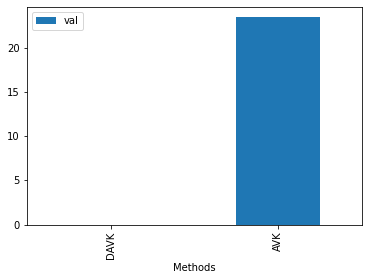

In [295]:
arr = [c,a]
df = pd.DataFrame({'Methods':['DAVK','AVK'], 'val':arr})

df.plot.bar(x ='Methods',y = 'val')

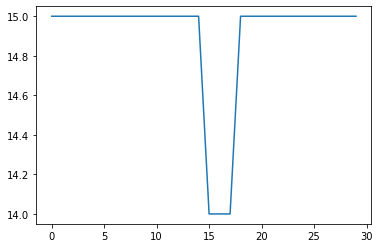

In [32]:
plt.plot(b)

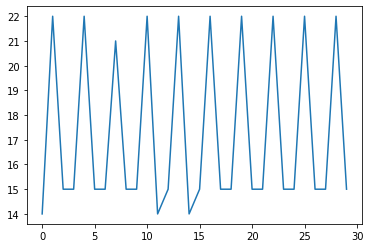

In [33]:
plt.plot(d)